*I want to create a git alias that intelligently handles merge conflicts and postpones manual conflict resolution. Note, this alias is created for a class environment in which an instructor posts class material in a git repository which students must pull locally and work through during lecture. Be careful using this alias outside that context.*

# Introduction

## Installation & Usage
Gitclass-pull is a git alias that can be called from the command line. Simply add the 'git-demo' file in this repo to your git path. To find you where you've installed git type the following your CLI:

In [2]:
!which git

/usr/local/bin/git


Next move the git-demo file into the same directory as your git installation. Make sure not to change the file name. When you call a git command (i.e. git demo), git looks for a executable file within its path with the same name as the command prefixed with "git-" (i.e. git-demo). This is one of the ways to make a git alias. 

So, to use gitclass-pull, **make sure you are in the git repo and branch you want to pull remote content into** and enter the following in your CLI:

In [3]:
!git demo

Already up-to-date.
Auto-merge was successful! Your local repo is now up to date.


## Conflict Resolution Methodology Overview
Gitclass-pull only deals with already commited changes (i.e. working tree = index tree). Gitclass-pull does not try to make any decision about working tree changes (i.e. commit, stash, reset) for the student. This decision is best left to the student.

The gitclass-pull tries to make intellegient decisions for the following 3 types of merge conflicts:

1. Same name local untracked file conflict
2. Delete & modify conflicts
3. File content conflicts

# Handling same name local untracked file conflict
This type of conflict occurs when the instructor add a file (i.e. local_untracked.txt) to the remote and the students creates a file in his local repo by the same name (i.e. local_untracked.txt) but leaves it untracked by git. Pulling will result in overwritting the local untracked file, so git raises the following error:

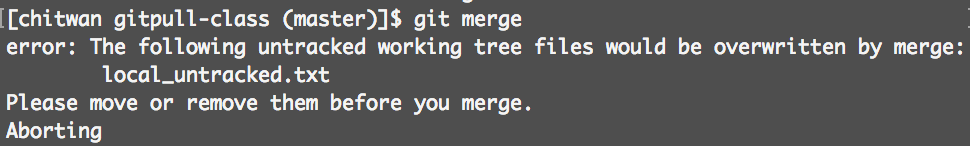

In this scenario, gitclass-pull compares a list of files instructor has added since the last merge and all files in the student's local repo and renames the local untracked files by appending '_local_untracked' to the filename.

In [5]:
#the following command outputs a list of files the instructor has added since the last merge
!git diff --name-only --diff-filter=A ...origin

#diff-filter=A flag means we are only look for added files
#name-only flag means to list just the name of the files

# Handling delete & modify conflicts
